In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from textblob import TextBlob

In [4]:
url="https://indianexpress.com/about/manipur-attack/"
html = requests.get(url)
soup = BeautifulSoup(html.content,'html.parser')
data_1={'Heading':[],'Article':[],'Sentiment':[]}
for i in soup.find_all('p'):
    data_1['Article'].append((i.text).replace("\n",'').replace("\r",'').replace('\xa0',''))
data_1['Article'] = data_1['Article'][::-1]
data_1['Article'] = data_1['Article'][::2]
for i in soup.find_all('h3'):
    data_1['Heading'].append(i.text)

In [5]:
url='https://www.ndtv.com/topic/manipur-violence'
html = requests.get(url)
soup = BeautifulSoup(html.content,'html.parser')

In [6]:
h=[]
for i in soup.find_all('div',{'class':"src_itm-ttl"}):
    h.append((i.text).replace("\n",'').replace("\r",'').replace('\xa0',''))
h = h[2:]

In [7]:
ar =[]
for i in soup.find_all('div',{'class':"src_itm-txt"}):
    ar.append((i.text).replace("\n",'').replace("\r",'').replace('\xa0','').replace('                        ','').replace('                    ',''))
ar = ar[2:]

In [8]:
for i in ar:
    data_1['Article'].append(i)
for i in h:
    data_1['Heading'].append(i)

In [9]:
polarity =[]
def analyze_sentiment(i):
    analysis=TextBlob(i)
    if analysis.sentiment.polarity>0:
        polarity.append(analysis.sentiment.polarity)
        return "positive"
    elif analysis.sentiment.polarity==0:
        polarity.append(analysis.sentiment.polarity)
        return "neutral"
    else:
        polarity.append(analysis.sentiment.polarity)
        return "negetive"

In [10]:
for i in data_1["Article"]:
    data_1['Sentiment'].append(analyze_sentiment(i))

In [11]:
data_1['Polarity'] = polarity

In [12]:
print(len(data_1['Polarity']))
print(len(data_1['Heading']))
print(len(data_1['Article']))
print(len(data_1['Sentiment']))

38
38
38
38


In [13]:
df = pd.DataFrame(data_1)

In [21]:
import seaborn as sns

<AxesSubplot: xlabel='Polarity', ylabel='Count'>

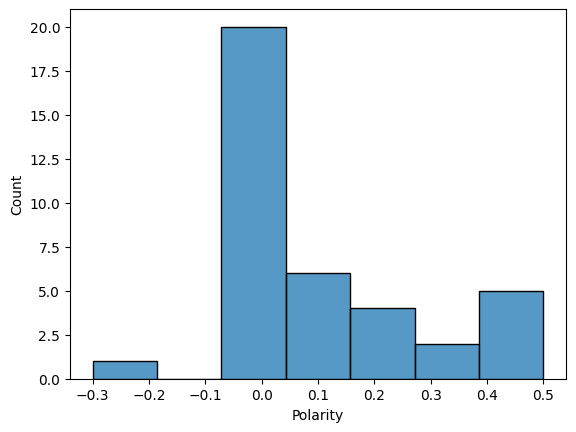

In [ ]:
sns.histplot(df['Polarity'])

In [ ]:
df.to_csv("C:/Users/Vivek negi/OneDrive/Desktop/data/smaple_data_1.csv",index=False)